# HW1: Get to know the data
HW1 introduces you the Fashion Mnist dataset with some useful preprocessing and visualization methods, and covers K-Means clustering for this dataset.

In [1]:
import os
import sys
sys.path.append("../../homework")
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import manifold
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns


%load_ext autoreload
%autoreload 2

## Fashion Mnist 
Read [here](https://github.com/zalandoresearch/fashion-mnist) to learn more about the Fashion Mnist  dataset. 

In [2]:
# Load the Fashion Mnist  data
import mnist_reader
trainX, trainy = mnist_reader.load_mnist('../data/', kind='train')
testX, testy = mnist_reader.load_mnist('../data/', kind='t10k')

In [3]:
# Print some statistics about the data
print("train image data shape:", trainX.shape)
print("train label data shape:", trainy.shape)
print("test image data shape:", testX.shape)
print("test label data shape:", testy.shape)

train image data shape: (60000, 784)
train label data shape: (60000,)
test image data shape: (10000, 784)
test label data shape: (10000,)


## 1. Visualize the flattened data (20 Points)
The 28x28 Fashion Mnist images have been flattened as 784 x 1 image vectors.

Flattening the data will lead to some loss of information (such as spatial correlation between pixels) but it is nevertheless useful for training some linear classifiers.

Write some code below to visualize the training “flattened” data. Please provide a brief analysis about the characteristics of flattened data from visualization.

Text(0.5, 0.92, 'Figure1: visualize the training flattened data')

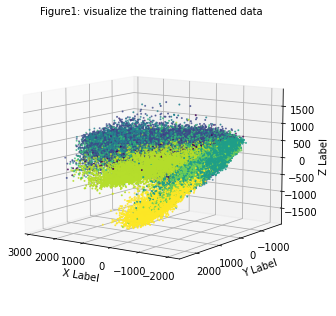

In [8]:
######################################################################
# TODO:                                                              #
# Visualize the data to analyze the characteristics of flattened data#
######################################################################
# your code
######################################################################
tsne3d = manifold.TSNE(n_components=3, init='pca', random_state=501)
X_tsne3d = tsne3d.fit_transform(trainX)
X_tsne3d
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X_tsne3d[:,0],X_tsne3d[:,1],X_tsne3d[:,2],s=1, c= trainy)
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.view_init(10, 125)
plt.title('Figure1: visualize the training flattened data', fontsize=10)
#                       END OF YOUR CODE                             #
######################################################################

__We reduce original 784 feature dimensional space to 3 dimensional space and plot 6000 data points inside.__

__From the Figure 1, we can tell that data points from the same class are close to each other and the separating hyperplanes are quite obvious and linear between classes.__

__Therefore, the flattened data should be useful for training some linear classifiers.__

## 2. Visualize the 2D averaged data  (20 Points)
Please write some code to reshape the training flattened data back to 2D 28x28 images and plot every "average" images of classes 0-9. Please provide a brief analysis about the difference between the 2D images and flattened data of Fashion Mnist from visualization.

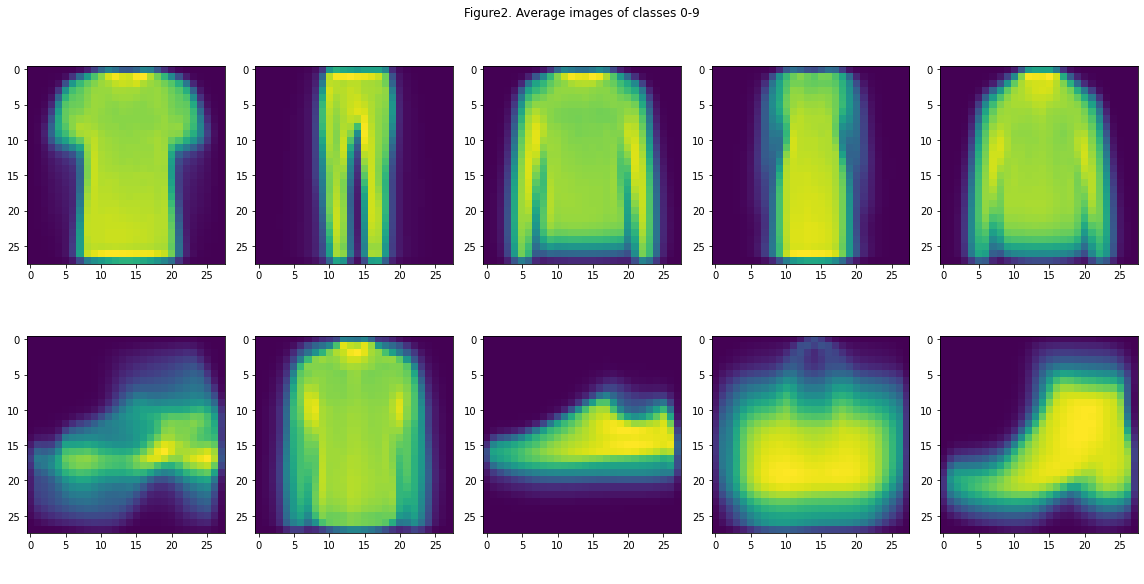

In [10]:
#####################################################################
# TODO:                                                             #
# Plot each "average image" of classes 0-9                          #
#####################################################################
# your code
average = {j: 0  for j in range(10)}
row = 2
col = 5
fig2 = plt.figure(figsize=(16,8))
plt.title('Figure2. Average images of classes 0-9')
plt.axis('off')
for i in range(10):
    mask_i = np.where(trainy==i)[0]
    average[i] = np.mean(trainX[mask_i,:], 0) 
    fig2.add_subplot(row,col,i+1)
    plt.imshow(average[i].reshape(28,28))
fig2.tight_layout()
#####################################################################
#                       END OF YOUR CODE                            #
#####################################################################

#### From the Figure2. Average images of classes 0-9', we can see each images represent the general shape of the fashion item of that class. 

#### Difference is that: 
    - 2D images give us an sense of the mean value for each of the class, but we can not obviously tell how variant this class is. Flattened data also give us information about the variance of each class.
    
    - 2D images let us know whether this data set is recognizable for human eyes. While flattened data of Fashion Mnist let us know if it this data set is classifiable by using computer.
    

## 3. Conduct PCA analysis for the flattened data (20 Points)
Please write some code to conduct the Principle Component Analysis (PCA) analysis for the training flattened data, and plot the <font color=black>**first 100 points of**</font> the first principle component against the second principle component. Note: please plot the components in different colors according to their classes. The coordinate of each point is (first_principle_component, second_principle_component).

From the visualization, please give a brief discussion on whether the first principle component and second principle component is sufficient to classify the 10 classes of flattened data?

Size of the dataframe: (60000, 785)
Explained variation per principal component: [0.29039228 0.1775531 ]


<AxesSubplot:xlabel='principal component 1', ylabel='principal component 2'>

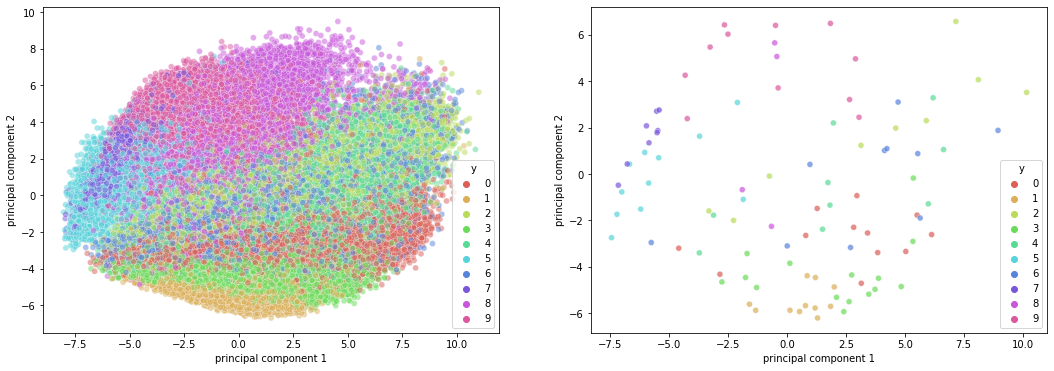

In [11]:
#####################################################################
# TODO:                                                             #
# PCA analysis for the 2D flattened data  
# Hint: from sklearn.decomposition import PCA
#       use PCA(svd_solver='auto').fit_transform(trainX) 
#       to compute the PCA of trainX                                #
#####################################################################
# your code starts here
x_train_flat = trainX/255.0

# np.min(x_train),np.max(x_train)

#  = x_train

feat_cols = ['pix'+str(i) for i in range(x_train_flat.shape[1])]
df_mnist = pd.DataFrame(x_train_flat,columns=feat_cols)
df_mnist['label'] = trainy
print('Size of the dataframe: {}'.format(df_mnist.shape))
pca_mnist = PCA(n_components=2, svd_solver='auto')
principalComponents_mnist = pca_mnist.fit_transform(df_mnist.iloc[:,:-1])
principal_mnist_Df = pd.DataFrame(data = principalComponents_mnist
             , columns = ['principal component 1', 'principal component 2'])
principal_mnist_Df['y'] = trainy

print('Explained variation per principal component: {}'.format(pca_mnist.explained_variance_ratio_))
pca100_mnist_Df = principal_mnist_Df.iloc[:100,:]
pca100_mnist_Df

f, axes = plt.subplots(1, 2, figsize=(18,6))

sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=principal_mnist_Df,
    legend="full",
    alpha=0.5,
    ax=axes[0]
)

sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=pca100_mnist_Df,
    legend="full",
    alpha=0.7,
    ax=axes[1]
)
#####################################################################
#                       END OF YOUR CODE                            #
#####################################################################

# The right side figure is the first 100 points PC1 vs PC2 plot ------------------------------> #

- From the Figure 3, we can tell that data points from the same class are clustered together on the 2d plane, but the boundary is not quite clear and there are some overlapping of the classes. Therefore, the first principle component and second principle component may not be sufficient to classify the 10 classes of flattened data if the required actuary is high.


- The result also tells that principal component 1 can explain 29% variation and principal component 2 can explain 17.7% variation. 46% of the total variation can be explained by them, which is not very high (<50%).


## 4. Implement K-Means clustering to cluster the first and second principle component (PC) of training flattened data (40 Points)

Please write some code to implement the K-Means clustering for the <font color=black>**first 100 points of**</font> first and second principle component (PC) of training flattened data obtained from step 3. Please briefly discuss about the clustering results.

For each of the 100 nodes, its coordinate is (firstPC, secondPC).

In [8]:
k = 10 # set k=10 for 10 classes in Fashion Mnist dataset

### 4.1 Initialization of Centroids (5 Points)

In this step, please randomly pick *k=10* centroids from the 100 1st-2nd PC pairs as centroids initialization.

The method `init_centroids()` should return a list of *k=10* different data points. Example format for 2d data points and *k=10*:

`centroids = [ [0, 0 ], [1, 1 ], [ 2, 2 ], ... ]`

In [12]:
def init_centroids(X, k):
    centroids = []
    ds= X
    ### Your code starts here ###############################################################
    for i in range(k):
#         ds = X[X.y==i].to_numpy()
        # m = len(ds)
        m = np.shape(ds)[0]
        r = np.random.randint(0, m-1)
        centroids.append([ds[r][0],ds[r][1]])

    ### Your code ends here #################################################################
    
    return centroids
# Example format:
#
# centroids = [ [0, 0 ], [1, 1 ], [ 2, 2 ], ... ]

pca_trainX = principal_mnist_Df.to_numpy()
X_kmeans = pca_trainX[:100,:2]  # pca_trainX should be your computed PCA result
centroids = init_centroids(X_kmeans, k)
centroids

[[-1.289106783553551, -4.891937478941142],
 [-6.207955292903975, -1.5127596792562983],
 [-5.762578339661339, -2.9547570089048216],
 [-6.037661182849497, 0.9287552269296296],
 [-7.217130507681545, -1.7369485524781125],
 [6.20220943355433, 3.2825305315542694],
 [5.550935432813929, 0.8782473558620815],
 [2.9676925471113744, -0.9338553022648836],
 [4.847906039427623, -4.851587478466628],
 [-1.6940860553922816, -3.4270050354892105]]

### 4.2 Cluster Assignment  (10 Points)

In this step, each data point is assigned to its nearest centroid. Hint: you may want to check [`numpy.linalg.norm`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) and [`numpy.argmin`](https://numpy.org/doc/stable/reference/generated/numpy.argmin.html) for calculating distances and finding the smallest values.

The method `assign_clusters()` should return a dictionary where the keys represent the ids of the *k* cluster ranging from *0* to *k-1*, and each value is a list of indices of the data points belonging to the respective cluster. For example,

`
clusters = {
   0: [57, 32, 0, 99],
   1: [5, 46, 72],
   2: [92, 15, 26, 97, 30],
   ...
}
`

In [13]:
def assign_clusters(X, k, centroids):
    # Reset all clusters
    clusters = {key: [] for key in range(k)}

    for idx, x in enumerate(X):
        
        ### Your code starts here ###############################################################
        dis = []
#         print(x)
        for i in range(k):
            dis.append(np.linalg.norm(x - centroids[i],axis=0).item())
        
#         print(dis)
#         print(idx)
        classid= np.argmin(dis)  #      classid= np.argmin(dis, axis=1)
        
        ### Your code ends here #################################################################
        
        # Only there so the empty loop does not throw an error
        # (you can remove that once you added your code)
        clusters[classid].append(idx)

    return clusters

#
# Example format
#
#clusters = {
#   0: [2, 4, 6, 8],
#   1: [0, 1, 5],
#   2: [3, 7, 9]
#}
clusters = assign_clusters(X_kmeans, k, centroids)
clusters

{0: [3, 16, 21, 31, 38, 59, 69, 71, 74, 78, 81, 86, 97],
 1: [8, 82],
 2: [33, 34],
 3: [6, 9, 12, 13, 15, 41, 42, 43, 46, 52, 60, 83, 85, 87, 89, 90, 93],
 4: [14, 30, 62, 63],
 5: [0, 7, 18, 23, 27, 29, 39, 44, 53, 65, 84, 88, 99],
 6: [1, 5, 11, 24, 32, 40, 55, 70, 75, 77],
 7: [22, 26, 28, 45, 48, 56, 61, 64, 68, 76, 79, 95],
 8: [4, 10, 17, 20, 25, 47, 49, 50, 51, 58, 66, 73, 80, 94, 98],
 9: [2, 19, 35, 36, 37, 54, 57, 67, 72, 91, 92, 96]}

### 4.3 Update of Centroids (5 Points)

In this step, please update all centroids based on the assgnment of data points. The updated centroids should be the average of its assigned data points.

The method `update_centroids()` should return a list of the same format as the method `init_centroids()`; see above.

In [14]:
def update_centroids(X, clusters, centroids):
    
    new_centroids = np.zeros_like(centroids)

    ### Your code starts here ###############################################################
    for c in range(k):
        new_centroids[c] = np.mean(X[clusters[c]], 0)
    
    ### Your code ends here #################################################################
    return new_centroids

centroids1 = update_centroids(X_kmeans, clusters, centroids)
centroids1

array([[-0.20062742, -5.20401441],
       [-6.03966023, -0.9517609 ],
       [-5.17825185, -3.07644304],
       [-4.7946667 ,  2.60551304],
       [-7.20813655, -1.43503983],
       [ 4.40173114,  4.34539713],
       [ 5.07888122,  0.33296322],
       [ 1.99789435, -0.58017759],
       [ 3.54858151, -4.54141561],
       [-1.775956  , -2.19847526]])

### 4.4 Implement K-Means clustering using above functions (15 Points)

In this step, please combine the above three steps into a single function to perform the K-Means clustering for the <font color=black>**first 100 of**</font> first and second principle component (PC) of training flattened data obtained from step 3. Note: Don't forget to stop once you find all clusters.

The method `kmeans` should return a clustering (same format as `assign_clusters()` and `update_centroids`), as well as the list of centroids after convergence (same format as `init_centroids()`).

In [23]:
def kmeans(X, k, max_iter=1000, verbose=True):
    clusters, num_iterations = {}, 0
    
    centroids = init_centroids(X, k)
#     print(centroids)

    for _ in range(max_iter):
        # Update the counter (+1 since we start from 0)
        num_iterations = num_iterations + 1
        
        ### Your code starts here ###############################################################
        

        clusters = assign_clusters(X, k, centroids)
#         centroids = update_centroids(X, clusters, centroids) # without considering converge

        centroids_new = update_centroids(X, clusters, centroids)
        if (centroids_new == centroids).all():
            break
        else:  centroids = centroids_new
        ### Your code ends here #################################################################
    
    # Let's print the number of comparison
    if verbose is True:
        print('K-Means required {} iterations to converge.'.format(num_iterations))
    
    return clusters, centroids


### 4.5 Test your Implementation (5 Points)

Run your implementation of K-Means for the <font color=black>**first 100 points of**</font> first and second principle component (PC) of training flattened data obtained from step 3, and visualize the results using the `plot_clusters` method we provide for you.

From the visualization, please briefly discuss about the clustering results.

K-Means required 11 iterations to converge.


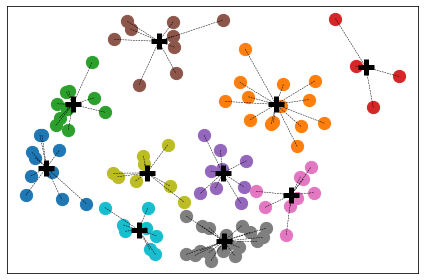

In [19]:
clusters, centroids = kmeans(X_kmeans, k, max_iter=1000)

mnist_reader.plot_clusters(X_kmeans, clusters, centroids)

**Discussion**

- From the visualization result, we can see that the first 100 data are clustered to 10 different classes. Within each cluster, data points are close to each other, which indicates that our K-Means clustering algorithm is working fine.


- However, these K-means clusters have some differences with the true classification result plotted in question 3.
    This is because points are clustered on 2-dimensional space made of PC1 and PC2. There could still be many variation that are not captured by these two principle components. Further test is need to prove the accuracy of this whole algorithms.

In your submission, in addition to the completed codes and the resulting images for the visualizations, also provide brief responses to the above questions and a brief analysis of the visualized data. 

You may refer to [here](http://colah.github.io/posts/2014-10-Visualizing-MNIST/) for more interesting and beautiful visualisations. Of course, the methods employed are more complex.